In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", 200)
pd.set_option("display.width", 140)

sns.set_style("whitegrid")

In [2]:
df = pd.read_csv("/Users/diyasansi/Desktop/NFL Play by Play 2009-2018 (v5).csv", low_memory=False)
df.head()

,play_id,game_id,home_team,away_team,posteam,posteam_type,defteam,side_of_field,yardline_100,game_date,quarter_seconds_remaining,half_seconds_remaining,game_seconds_remaining,game_half,quarter_end,drive,sp,qtr,down,goal_to_go,time,yrdln,ydstogo,ydsnet,desc,play_type,yards_gained,shotgun,no_huddle,qb_dropback,qb_kneel,qb_spike,qb_scramble,pass_length,pass_location,air_yards,yards_after_catch,run_location,run_gap,field_goal_result,kick_distance,extra_point_result,two_point_conv_result,home_timeouts_remaining,away_timeouts_remaining,timeout,timeout_team,td_team,posteam_timeouts_remaining,defteam_timeouts_remaining,total_home_score,total_away_score,posteam_score,defteam_score,score_differential,posteam_score_post,defteam_score_post,score_differential_post,no_score_prob,opp_fg_prob,opp_safety_prob,opp_td_prob,fg_prob,safety_prob,td_prob,extra_point_prob,two_point_conversion_prob,ep,epa,total_home_epa,total_away_epa,total_home_rush_epa,total_away_rush_epa,total_home_pass_epa,total_away_pass_epa,air_epa,yac_epa,comp_air_epa,comp_yac_epa,total_home_comp_air_epa,total_away_comp_air_epa,total_home_comp_yac_epa,total_away_comp_yac_epa,total_home_raw_air_epa,total_away_raw_air_epa,total_home_raw_yac_epa,total_away_raw_yac_epa,wp,def_wp,home_wp,away_wp,wpa,home_wp_post,away_wp_post,total_home_rush_wpa,total_away_rush_wpa,total_home_pass_wpa,total_away_pass_wpa,air_wpa,yac_wpa,...,assist_tackle,lateral_reception,lateral_rush,lateral_return,lateral_recovery,passer_player_id,passer_player_name,receiver_player_id,receiver_player_name,rusher_player_id,rusher_player_name,lateral_receiver_player_id,lateral_receiver_player_name,lateral_rusher_player_id,lateral_rusher_player_name,lateral_sack_player_id,lateral_sack_player_name,interception_player_id,interception_player_name,lateral_interception_player_id,lateral_interception_player_name,punt_returner_player_id,punt_returner_player_name,lateral_punt_returner_player_id,lateral_punt_returner_player_name,kickoff_returner_player_name,kickoff_returner_player_id,lateral_kickoff_returner_player_id,lateral_kickoff_returner_player_name,punter_player_id,punter_player_name,kicker_player_name,kicker_player_id,own_kickoff_recovery_player_id,own_kickoff_recovery_player_name,blocked_player_id,blocked_player_name,tackle_for_loss_1_player_id,tackle_for_loss_1_player_name,tackle_for_loss_2_player_id,tackle_for_loss_2_player_name,qb_hit_1_player_id,qb_hit_1_player_name,qb_hit_2_player_id,qb_hit_2_player_name,forced_fumble_player_1_team,forced_fumble_player_1_player_id,forced_fumble_player_1_player_name,forced_fumble_player_2_team,forced_fumble_player_2_player_id,forced_fumble_player_2_player_name,solo_tackle_1_team,solo_tackle_2_team,solo_tackle_1_player_id,solo_tackle_2_player_id,solo_tackle_1_player_name,solo_tackle_2_player_name,assist_tackle_1_player_id,assist_tackle_1_player_name,assist_tackle_1_team,assist_tackle_2_player_id,assist_tackle_2_player_name,assist_tackle_2_team,assist_tackle_3_player_id,assist_tackle_3_player_name,assist_tackle_3_team,assist_tackle_4_player_id,assist_tackle_4_player_name,assist_tackle_4_team,pass_defense_1_player_id,pass_defense_1_player_name,pass_defense_2_player_id,pass_defense_2_player_name,fumbled_1_team,fumbled_1_player_id,fumbled_1_player_name,fumbled_2_player_id,fumbled_2_player_name,fumbled_2_team,fumble_recovery_1_team,fumble_recovery_1_yards,fumble_recovery_1_player_id,fumble_recovery_1_player_name,fumble_recovery_2_team,fumble_recovery_2_yards,fumble_recovery_2_player_id,fumble_recovery_2_player_name,return_team,return_yards,penalty_team,penalty_player_id,penalty_player_name,penalty_yards,replay_or_challenge,replay_or_challenge_result,penalty_type,defensive_two_point_attempt,defensive_two_point_conv,defensive_extra_point_attempt,defensive_extra_point_conv
0,46,2009091000,PIT,TEN,PIT,home,TEN,TEN,30.0,2009-09-10,900.0,1800.0,3600.0,Half1,0,1,0,1,NaN,0.0,15:00,TEN 30,0,0,R.Bironas kicks 67 yards from TEN 30 to PIT 3....,kickoff,0.0,0,0,0.0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6

In [3]:
df.shape

(449371, 255)

In [4]:
df.columns

Index(['play_id', 'game_id', 'home_team', 'away_team', 'posteam', 'posteam_type', 'defteam', 'side_of_field', 'yardline_100', 'game_date',
       ...
       'penalty_player_id', 'penalty_player_name', 'penalty_yards', 'replay_or_challenge', 'replay_or_challenge_result', 'penalty_type',
       'defensive_two_point_attempt', 'defensive_two_point_conv', 'defensive_extra_point_attempt', 'defensive_extra_point_conv'],
      dtype='object', length=255)

In [6]:
wanted = [
    # identity
    "play_id", "game_id", "home_team", "away_team",
    "posteam", "defteam",

    # time / season
    "season", "week", "qtr",
    "game_seconds_remaining", "quarter_seconds_remaining", "time",

    # situation
    "down", "ydstogo", "yardline_100",

    # play decision
    "play_type", "shotgun", "no_huddle",
    "pass_attempt", "rush_attempt",

    # outcomes
    "yards_gained", "first_down", "touchdown",
    "interception", "fumble_lost",

    # risk / value metrics
    "epa", "wpa", "wp",

    # score
    "score_differential", "score_differential_post"
]

existing = [c for c in wanted if c in df.columns]
missing = [c for c in wanted if c not in df.columns]

print("Keeping:", len(existing), "columns")
print("Missing:", len(missing), "columns")

df_small = df[existing].copy()
df_small.head()

Keeping: 27 columns
Missing: 3 columns


,play_id,game_id,home_team,away_team,posteam,defteam,qtr,game_seconds_remaining,quarter_seconds_remaining,time,down,ydstogo,yardline_100,play_type,shotgun,no_huddle,pass_attempt,rush_attempt,yards_gained,touchdown,interception,fumble_lost,epa,wpa,wp,score_differential,score_differential_post
0,46,2009091000,PIT,TEN,PIT,TEN,1,3600.0,900.0,15:00,NaN,0,30.0,kickoff,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.014474,NaN,NaN,NaN,0.0
1,68,2009091000,PIT,TEN,PIT,TEN,1,3593.0,893.0,14:53,1.0,10,58.0,pass,0,0,1.0,0.0,5.0,0.0,0.0,0.0,0.077907,0.004655,0.546433,0.0,0.0
2,92,2009091000,PIT,TEN,PIT,TEN,1,3556.0,856.0,14:16,2.0,5,53.0,run,0,0,0.0,1.0,-3.0,0.0,0.0,0.0,-1.402760,-0.040295,0.551088,0.0,0.0
3,113,2009091000,PIT,TEN,PIT,TEN,1,3515.0,815.0,13:35,3.0,8,56.0,pass,1,0,1.0,0.0,0.0,0.0,0.0,0.0,-1.712583,-0.049576,0.510793,0.0,0.0
4,139,2009091000,PIT,TEN,PIT,TEN,1,3507.0,807.0,13:27,4.0,8,56.0,punt,0,0,0.0,0.0,0.0,0.0,0.0,0.0,2.097796,0.097712,0.461217,0.0,0.0


This output confirms that the dataset has been successfully reduced from its original 255 columns to a focused subset of 27 columns that are directly relevant to analyzing game situations, decision-making, and outcomes. The retained columns capture essential context such as game state (quarter, time remaining, score differential), situational variables (down, yards to go, field position), decision indicators (play type, pass vs run), and outcome metrics (yards gained, EPA, WPA, turnovers, and win probability). A small number of columns were missing, but none are critical to the core analysis, indicating that the dataset still contains all necessary information to support risk and outcome evaluation. The previewed rows show play-level data where each row represents a single NFL play, validating that the data structure is suitable for event-by-event analysis of how decisions influence game outcomes under varying levels of pressure.

In [7]:
# Keep only run/pass plays and drop rows without team in possession
df_small = df_small[df_small["posteam"].notna()].copy()

if "play_type" in df_small.columns:
    df_small = df_small[df_small["play_type"].isin(["run", "pass"])].copy()

df_small.shape

(319369, 27)

In [8]:
# choosing the best available time-remaining column
time_col = "game_seconds_remaining" if "game_seconds_remaining" in df_small.columns else \
           "quarter_seconds_remaining" if "quarter_seconds_remaining" in df_small.columns else None

# late game: 4th quarter
df_small["late_game"] = df_small["qtr"].ge(4)

# close game: within 7 points (use whichever score differential is available)
score_col = "score_differential" if "score_differential" in df_small.columns else \
            "score_differential_post" if "score_differential_post" in df_small.columns else None

if score_col:
    df_small["close_game"] = df_small[score_col].abs().le(7)
else:
    df_small["close_game"] = False  # fallback

df_small["high_pressure"] = df_small["late_game"] & df_small["close_game"]

# red zone + 3rd & long
df_small["red_zone"] = df_small["yardline_100"].le(20)
df_small["third_and_long"] = (df_small["down"].eq(3) & df_small["ydstogo"].ge(7))

df_small[["late_game", "close_game", "high_pressure", "red_zone", "third_and_long"]].mean()

late_game         0.273968
close_game        0.626332
high_pressure     0.126111
red_zone          0.140706
third_and_long    0.101998
dtype: float64

This summary shows the proportion of plays that occur under different game situations and pressure conditions. Approximately 27% of all plays take place in the fourth quarter, while nearly 63% occur in games where the score differential is within one touchdown, indicating that a large portion of plays are relatively competitive. However, only about 13% of plays meet the criteria for high-pressure situations, defined as late-game plays in close contests, highlighting that truly critical moments are relatively rare. Red-zone plays account for roughly 14% of the data, and third-and-long situations represent about 10%, both of which are traditionally high-leverage scenarios. Together, these proportions demonstrate that while most plays happen in lower-pressure contexts, a meaningful subset occurs in situations where risk and decision-making have a disproportionate impact on game outcomes, making them a natural focus for deeper analysis.

In [9]:
df_small[["epa","wpa","wp"]].describe().T if all(c in df_small.columns for c in ["epa","wpa","wp"]) else df_small.describe(include="all").T.head(20)

,count,mean,std,min,25%,50%,75%,max
epa,318518.0,-0.001258,1.424975,-1.284959e+01,-0.683947,-0.218843,0.697286,9.508015
wpa,318224.0,0.000871,0.045237,-9.750487e-01,-0.017587,-0.002464,0.015099,0.994848
wp,319367.0,0.502457,0.285936,2.220446e-16,0.280221,0.511856,0.724366,1.000000


The descriptive statistics for expected points added (EPA), win probability added (WPA), and win probability (WP) provide insight into the overall distribution of value and risk across individual NFL plays. On average, both EPA and WPA are close to zero, indicating that most plays have a relatively small impact on expected scoring and game outcomes. However, the wide ranges and large standard deviations reveal substantial variability, with some plays resulting in significant negative or positive swings. EPA values range from large losses to high-gain plays, while WPA spans nearly the full range from close to −1 to +1, reflecting rare but extremely high-impact moments that can dramatically alter a game’s trajectory. The win probability distribution centers around 0.5, suggesting that many plays occur in relatively balanced game states, while the full 0 to 1 range confirms the presence of both dominant and desperate situations. Overall, these distributions highlight the inherently volatile nature of NFL games, where most plays are low-impact but a small number carry outsized risk and reward.

In [12]:
# Successful play: positive expected points
df_small["successful_play"] = df_small["epa"] > 0

# Turnover indicator
df_small["turnover"] = (
    (df_small["interception"] == 1) |
    (df_small["fumble_lost"] == 1)
).astype(int)

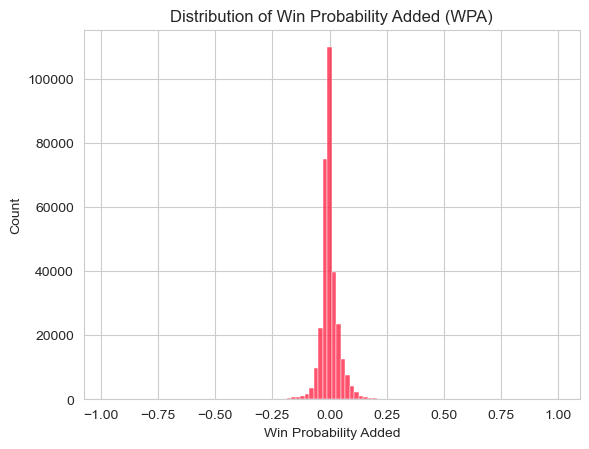

In [33]:
sns.histplot(df_small["wpa"].dropna(), bins=100, color ='#ff193c')
plt.title("Distribution of Win Probability Added (WPA)")
plt.xlabel("Win Probability Added")
plt.show()

This histogram illustrates the distribution of Win Probability Added (WPA) across all plays in the dataset. The distribution is highly concentrated around zero, indicating that the vast majority of plays result in only marginal changes to a team’s chances of winning. This reflects the incremental nature of football, where most plays slightly nudge the game state rather than dramatically altering it. However, the presence of long tails on both the positive and negative sides shows that a small subset of plays produces substantial swings in win probability. These rare but impactful moments—such as turnovers, explosive plays, or late-game scoring events—are responsible for a disproportionate share of game outcomes. Overall, the distribution highlights the asymmetry of risk in NFL decision-making: while most choices carry limited immediate consequences, a few critical decisions can significantly shape the final result.

In [14]:
pressure_df = df_small[df_small["high_pressure"]]

decision_summary = (
    pressure_df
    .groupby("play_type")
    .agg(
        avg_epa=("epa", "mean"),
        success_rate=("successful_play", "mean"),
        turnover_rate=("turnover", "mean"),
        avg_wpa=("wpa", "mean"),
        plays=("epa", "count")
    )
    .sort_values("avg_epa", ascending=False)
)

decision_summary

,avg_epa,success_rate,turnover_rate,avg_wpa,plays
play_type,,,,,
pass,0.038539,0.427755,0.036779,0.002768,23725
run,-0.081337,0.351519,0.006873,0.001355,16244


This comparison highlights clear differences in risk and reward between passing and running plays. Passing plays generate a positive average EPA and higher win probability added, indicating greater potential upside and overall effectiveness when successful. They also exhibit a higher success rate than runs, suggesting that passing is generally more efficient at advancing the offense. However, this increased reward comes with significantly higher risk, as the turnover rate for passing plays is more than five times that of running plays. In contrast, running plays show a negative average EPA and lower success rate, reflecting their more conservative nature, but they carry substantially lower turnover risk. This trade-off underscores a central theme of NFL strategy: passing offers higher expected returns at the cost of increased volatility, while running provides stability and ball security with limited upside.

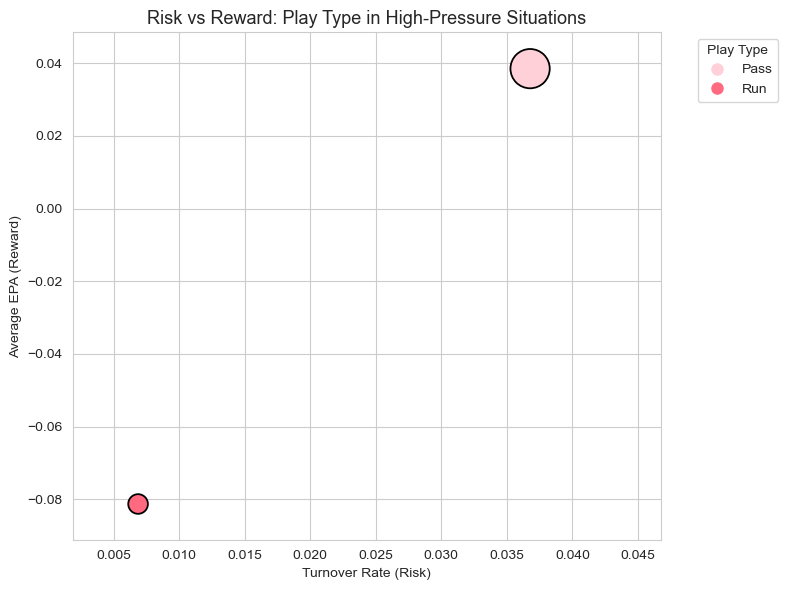

In [28]:
import matplotlib.lines as mlines

plt.figure(figsize=(8, 6))

ax = sns.scatterplot(
    data=decision_summary.reset_index(),
    x="turnover_rate",
    y="avg_epa",
    hue="play_type",
    size="plays",
    sizes=(200, 800),
    palette={
        "pass": "#ffd0d7",  # light pink
        "run": "#ff6a80"    # darker pink
    },
    edgecolor="black",
    legend=False  # turn off seaborn legend entirely
)

# Axis padding
plt.xlim(
    decision_summary["turnover_rate"].min() - 0.005,
    decision_summary["turnover_rate"].max() + 0.01
)
plt.ylim(
    decision_summary["avg_epa"].min() - 0.01,
    decision_summary["avg_epa"].max() + 0.01
)

plt.title("Risk vs Reward: Play Type in High-Pressure Situations", fontsize=13)
plt.xlabel("Turnover Rate (Risk)")
plt.ylabel("Average EPA (Reward)")

pass_legend = mlines.Line2D(
    [], [], color="#ffd0d7", marker="o", linestyle="None",
    markersize=8, label="Pass"
)
run_legend = mlines.Line2D(
    [], [], color="#ff6a80", marker="o", linestyle="None",
    markersize=8, label="Run"
)

plt.legend(
    handles=[pass_legend, run_legend],
    title="Play Type",
    bbox_to_anchor=(1.05, 1),
    loc="upper left"
)

plt.tight_layout()
plt.show()

This chart compares the risk and reward of passing versus running plays in high-pressure situations in NFL games. The x-axis represents turnover risk, while the y-axis shows average expected points added (EPA), a measure of how much a play improves a team’s scoring chances. Passing plays appear in the upper-right area of the chart, indicating that they generate higher average EPA but also come with a greater risk of turnovers. In contrast, running plays are positioned in the lower-left, showing lower turnover risk but negative average EPA, meaning they tend to reduce expected scoring outcomes in these situations. The size of each bubble reflects how frequently the play type is used, highlighting that teams still rely heavily on passing despite the increased risk, likely because of its higher potential reward.

In [19]:
situation_summary = (
    df_small
    .groupby(["high_pressure", "play_type"])
    .agg(
        avg_epa=("epa", "mean"),
        success_rate=("successful_play", "mean"),
        turnover_rate=("turnover", "mean"),
        avg_wpa=("wpa", "mean"),
        plays=("epa", "count")
    )
    .reset_index()
)

situation_summary

,high_pressure,play_type,avg_epa,success_rate,turnover_rate,avg_wpa,plays
0,False,pass,0.036004,0.443262,0.030910,0.001701,162396
1,False,run,-0.050285,0.378721,0.008093,-0.000746,116153
2,True,pass,0.038539,0.427755,0.036779,0.002768,23725
3,True,run,-0.081337,0.351519,0.006873,0.001355,16244


This table compares the performance of passing and running plays across normal and high-pressure situations, revealing how context influences both risk and effectiveness. In non–high-pressure scenarios, passing plays already outperform runs, with higher average EPA and success rates, albeit with greater turnover risk. Under high-pressure conditions, this pattern becomes even more pronounced. Passing plays continue to generate positive average EPA and higher win probability added, while running plays become less effective, showing more negative EPA and lower success rates. At the same time, the turnover risk associated with passing increases further in high-pressure moments, whereas running remains comparatively safer. These results suggest that pressure amplifies the trade-off between risk and reward: aggressive strategies offer continued upside but at higher cost, while conservative strategies sacrifice effectiveness for stability. This highlights the strategic challenge teams face in critical moments—balancing the need to avoid costly mistakes against the potential value of impactful plays.

In [20]:
top_swings = (
    df_small[["game_id", "qtr", "game_seconds_remaining",
              "posteam", "play_type", "epa", "wpa"]]
    .dropna()
    .sort_values("wpa", ascending=False)
    .head(20)
)

top_swings

,game_id,qtr,game_seconds_remaining,posteam,play_type,epa,wpa
302509,2015120300,4,0.0,GB,pass,5.846742,0.994848
30135,2009112908,4,6.0,TEN,pass,4.522390,0.969944
166721,2012120205,4,3.0,IND,pass,4.957004,0.965698
169368,2012120907,4,16.0,PHI,pass,4.016595,0.940764
417626,2018093000,4,12.0,CIN,pass,4.010533,0.939864
272868,2015091312,4,13.0,DAL,pass,4.123232,0.938929
124776,2011121103,4,8.0,HOU,pass,3.065129,0.937393
112059,2011110612,4,14.0,BAL,pass,4.928386,0.929190
142985,2012092400,4,8.0,SEA,pass,5.371513,0.927971
284329,2015101200,4,12.0,PIT,pass,3.297078,0.927864


This table highlights the most impactful plays in the dataset based on win probability added (WPA), capturing extreme high-leverage moments late in games. All listed plays occur in the fourth quarter with only seconds remaining, where the outcome of a single decision can effectively decide the game. Notably, every play in this subset is a passing play, reinforcing earlier findings that teams rely on aggressive strategies in critical situations despite the increased risk. The exceptionally high EPA and WPA values indicate that these plays produced dramatic shifts in game outcomes, often swinging win probability by more than 90%. These moments represent the upper tail of decision impact in NFL games, illustrating how a small number of high-risk choices can overshadow thousands of routine plays. This reinforces the central insight of the analysis: while most decisions have marginal effects, success or failure in a few high-pressure moments can ultimately determine victory or defeat.

In [30]:
# Selecting columns needed for Tableau dashboards
tableau_cols = [
    "game_id",
    "qtr",
    "game_seconds_remaining",
    "posteam",
    "play_type",
    "down",
    "ydstogo",
    "yardline_100",
    "epa",
    "wpa",
    "wp",
    "score_differential",
    "score_differential_post",
    "high_pressure",
    "late_game",
    "close_game",
    "red_zone",
    "turnover"
]

tableau_df = df_small[tableau_cols].dropna(subset=["epa", "wpa", "wp"])

# Exporting to CSV for Tableau
tableau_df.to_csv(
    "/Users/diyasansi/Desktop/nfl_play_by_play_tableau.csv",
    index=False
)

print("✅ Tableau-ready dataset saved to Desktop")

✅ Tableau-ready dataset saved to Desktop
